# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>Cet ensemble de données contient des informations sur plus de  10 000 films sortie entre 1960-2015, collectés à partir de  Movie Database (TMDb), y compris les notes des utilisateurs et les revenus.
Les colonnes du dataset sont:
>- **id:**identifiant du film
>- **imdb_id:**identifiant pour le titre du film
>- **popularity:**la popularité du film
>- **budget:** le budget du film au moment de sa sortie
>- **revenue:** les revenues réalisées par le film au moment de sa sortie
>- **original_title:**le titre original du film
>- **cast:** la liste des principaux acteurs du film
>- **homepage:**le lien vers la page accueill du site web du film
>- **director:**le(s) nom(s) des realisateurs du film
>- **tagline:** le slogan du film
>- **keywords:**les mots cles pour la recherche ou indexation du film
>- **overview:**resume du film
>- **runtime:**la durée du film
>- **genres:**le(s) genre(s) du film
>- **production_companies:**le(s) société(s) de production du film
>- **release_date:** le jour de sortie du film
>- **vote_count:**le nombre des votes
>- **vote_average:**la moyenne des votes
>- **release_year:** l'année de sortie du film
>- **budget_adj:** le budget du film ajusté à l'inflation
>- **revenue_adj** la revenue du film ajusté à l'inflation

### Question(s) for Analysis
>Notre analyse veut connaitre des informations sur les film sorties les deux(2) derniers années

> voici 4 questions principaux questions que je veux explorer pour faire mon analyse de donnée
>1. Quels sont les films les plus populaires entre 2014 et 2015?
>2. Quels sont les profits realisés par les films entre 2014 et 2015?
>3. Quels sont les genres de films les plus appréciés du public entre 2014 et 2015?
>4. Est-ce que les films qui ont rapporté plus de revenus, sont-ils les plus populaires entre 2014 et 2015?

In [1]:
#import for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Dans cette partie on va évaluer, inspecter les types des données et nettoyer les données.


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df_movies=pd.read_csv('tmdb-movies.csv')
df_movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### 
> On peut voir qu’il ya des colonnes qu’on n’a pas besoins pour répondre aux questions, tels que : homepage, tagline, keywords, overview, runtime     
Il ya aussi certaines colonnes qui veut dire presque la même chose :id et imdb_id,budget et budget_adj,revenue et revenue_adj, release_date et release_year   

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### 
> Dans cet dataset on a: 10866 entries ou lignes et 21 colonnes;

> on a aussi des valeurs manquantes dans les colonnes:imdb_id, cast, homepage, director,tagline, keywords, overview, genres,production_companies. 

> on constate également que les valeurs des types de données sont les mêmes à l'exception  de release_date dont le type de donnée est « Object » alors que la valeur des données est « Date »  

In [4]:
#afficher le nombre des valeurs unique pour chaque colonne
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
#afficher le nombre de valeurs manquantes pour chaque colonne
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#afficher le nombre des doublons
df_movies.duplicated().sum()

1

### 
> on constate qu'il ya beaucoup de colonnes qui on des valeurs manquantes.

> on na qu'une seule ligne dupliquée


### Data Cleaning
> Pour pouvoir repondre aux questions on va devoir créer deux(2) échantillons de données :
> 1. Selectionner les données entre 2014 et 2015
> 2. Supprimer les colonnes non necessaire pour analyse
> 3. Supprimer les valeurs nulles et doublons
> 4. Filtrer et corriger les types de données
> 5. Sauvegarder les dataframes dans des fichiers CSV
 

**1. Selectionner les données entre 2014 et 2015**

In [7]:
df_2014_2015=df_movies.query('release_year>=2014 & release_year<=2015')
df_2014_2015.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df_2014_2015.shape

(1329, 21)

> la selectionne des films de 2014 à 2015 à 1329 lignes et 21 colonnes

**2. Supprimer les colonnes non necessaire pour analyse**

id,homepage,tagline,keywords,overview,runtime,release_date,budget_adj,revenue_adj

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'
df_2014_2015.drop(['id','homepage','tagline','keywords','overview','runtime','release_date','budget_adj','revenue_adj'],axis=1,inplace=True)

In [10]:
df_2014_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1328
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1327 non-null   object 
 1   popularity            1329 non-null   float64
 2   budget                1329 non-null   int64  
 3   revenue               1329 non-null   int64  
 4   original_title        1329 non-null   object 
 5   cast                  1309 non-null   object 
 6   director              1321 non-null   object 
 7   genres                1326 non-null   object 
 8   production_companies  1206 non-null   object 
 9   vote_count            1329 non-null   int64  
 10  vote_average          1329 non-null   float64
 11  release_year          1329 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 135.0+ KB


**3. Supprimer les valeurs nulles et doublons**

In [11]:
# afficher le nombre des doublons
df_2014_2015.duplicated().sum()

0

In [12]:
#afficher le nombre de valeurs manquantes pour chaque colonne
df_2014_2015.isnull().sum()

imdb_id                   2
popularity                0
budget                    0
revenue                   0
original_title            0
cast                     20
director                  8
genres                    3
production_companies    123
vote_count                0
vote_average              0
release_year              0
dtype: int64

> on peut avoir qu'il n'y pas de doublons.Il ya aussi 5 colonnes qui ont des valeurs nulles, on va devoir supprimer

In [13]:
#suppression des lignes avec des valeurs nulles
df_2014_2015.dropna(inplace=True)

In [14]:
#vérifie si l'une des colonnes de df_2014_2015 a des valeurs nulles - le resultat devrait afficher False
df_2014_2015.isnull().sum().any()

False

**4. Filtre et corriger les types de données**

créeons deux (2) echantillons film_revenu_popularite.csv et film_genre.csv

In [15]:
#créons le premier echantillon film_revenu_popularite 
#avec des colonnes: imdb_id ,popularity,budget, revenue,original_title et release_year 
df_film_revenu_popularite=df_2014_2015.iloc[:,[0,1,2,3,4,11]]

In [16]:
df_film_revenu_popularite.head()

,imdb_id,popularity,budget,revenue,original_title,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,2015


In [17]:
df_film_revenu_popularite.shape

(1193, 6)

In [18]:
df_film_revenu_popularite.nunique()

imdb_id           1193
popularity        1192
budget             152
revenue            441
original_title    1192
release_year         2
dtype: int64

In [19]:
df_film_revenu_popularite.original_title.duplicated().sum()

1

> on constate qu'il ya un titre de film dupliqué dans l'échantillon, mais avant de supprimer ce doublon on doit vérifier si l'année de sortie est le même.Pour nous, assurer que c'est n'est pas un film qu'on a sorti une deuxième fois.


In [20]:
df=df_film_revenu_popularite.loc[df_film_revenu_popularite.original_title.duplicated()]
df

,imdb_id,popularity,budget,revenue,original_title,release_year
1133,tt3297792,0.188264,0,0,Survivor,2014


In [21]:
df=df_film_revenu_popularite.query('original_title=="Survivor"')
df

,imdb_id,popularity,budget,revenue,original_title,release_year
67,tt3247714,2.331636,20000000,0,Survivor,2015
1133,tt3297792,0.188264,0,0,Survivor,2014


> Il semble que le titre et l'année de sortie du film sont differents.c'est le même film qu'on a sorti en 2014 et 2015, donc nous ne supprimerons pas ce film.

In [22]:
#créons le deuxième echantillon film_genre 
df_film_genre=df_2014_2015.iloc[:,[0,7,9]] 
df_film_genre.head()

,imdb_id,genres,vote_count
0,tt0369610,Action|Adventure|Science Fiction|Thriller,5562
1,tt1392190,Action|Adventure|Science Fiction|Thriller,6185
2,tt2908446,Adventure|Science Fiction|Thriller,2480
3,tt2488496,Action|Adventure|Science Fiction|Fantasy,5292
4,tt2820852,Action|Crime|Thriller,2947


In [23]:
#retourne un tuple des dimensions du dataframe
df_film_genre.shape

(1193, 3)

In [24]:
#retourne les types de données des colonnes
df_film_genre.dtypes

imdb_id       object
genres        object
vote_count     int64
dtype: object

In [25]:
# Nous allons décomposer les genres du film avec la fonction pandas.Series.str.split('|')
df1=df_film_genre['genres'].str.split('|',expand=True)
df1

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
1318,Drama,Action,Crime,None,None
1320,Crime,None,None,None,None
1322,Documentary,Music,None,None,None
1323,Documentary,None,None,None,None


In [26]:
pd.options.mode.chained_assignment = None  # default='warn'
df_film_genre[['split1','split2','split3','split4','split5']]=df_film_genre['genres'].str.split('|',expand=True)
df_film_genre

,imdb_id,genres,vote_count,split1,split2,split3,split4,split5
0,tt0369610,Action|Adventure|Science Fiction|Thriller,5562,Action,Adventure,Science Fiction,Thriller,None
1,tt1392190,Action|Adventure|Science Fiction|Thriller,6185,Action,Adventure,Science Fiction,Thriller,None
2,tt2908446,Adventure|Science Fiction|Thriller,2480,Adventure,Science Fiction,Thriller,None,None
3,tt2488496,Action|Adventure|Science Fiction|Fantasy,5292,Action,Adventure,Science Fiction,Fantasy,None
4,tt2820852,Action|Crime|Thriller,2947,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...
1318,tt3380264,Drama|Action|Crime,13,Drama,Action,Crime,None,None
1320,tt3157224,Crime,11,Crime,None,None,None,None
1322,tt3785068,Documentary|Music,32,Documentary,Music,None,None,None
1323,tt3511812,Documentary,16,Documentary,None,None,None,None


In [27]:
df_film_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 1325
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   imdb_id     1193 non-null   object
 1   genres      1193 non-null   object
 2   vote_count  1193 non-null   int64 
 3   split1      1193 non-null   object
 4   split2      835 non-null    object
 5   split3      425 non-null    object
 6   split4      131 non-null    object
 7   split5      25 non-null     object
dtypes: int64(1), object(7)
memory usage: 83.9+ KB


In [28]:
# nous allons separer les lignes de chaque genre de film
df_split1=df_film_genre.iloc[:,[2,3]]
df_split2=df_film_genre.iloc[:,[2,4]]
df_split3=df_film_genre.iloc[:,[2,5]]
df_split4=df_film_genre.iloc[:,[2,6]]
df_split5=df_film_genre.iloc[:,[2,7]]

In [29]:
print ("Dataframe split1: \n", df_split1.isnull().sum())
print ("\nDataframe split2: \n", df_split2.isnull().sum())
print ("\nDataframe split3: \n", df_split3.isnull().sum())
print ("\nDataframe split4: \n", df_split4.isnull().sum())
print ("\nDataframe split5: \n", df_split5.isnull().sum())

Dataframe split1: 
 vote_count    0
split1        0
dtype: int64

Dataframe split2: 
 vote_count      0
split2        358
dtype: int64

Dataframe split3: 
 vote_count      0
split3        768
dtype: int64

Dataframe split4: 
 vote_count       0
split4        1062
dtype: int64

Dataframe split5: 
 vote_count       0
split5        1168
dtype: int64


In [30]:
#suppressions des valeurs nulles
df_split2.dropna(inplace=True)
df_split3.dropna(inplace=True)
df_split4.dropna(inplace=True)
df_split5.dropna(inplace=True)

In [31]:
#renommer le nom des colones
df_split1.rename({"split1":"genres"}, axis=1,inplace=True)
df_split2.rename({"split2":"genres"}, axis=1,inplace=True)
df_split3.rename({"split3":"genres"}, axis=1,inplace=True)
df_split4.rename({"split4":"genres"}, axis=1,inplace=True)
df_split5.rename({"split5":"genres"}, axis=1,inplace=True)

In [32]:
#combiner les dataframes avec la fonction concat
df_genre_vote=pd.concat([df_split1,df_split2,df_split3,df_split4,df_split5])
df_genre_vote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 0 to 1178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vote_count  2609 non-null   int64 
 1   genres      2609 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.1+ KB


**5. Sauvegarder les dataframes dans des fichiers CSV**

In [33]:
df_film_revenu_popularite.to_csv('tmdb_film_revenu_popularite_clean.csv', index=False)
df_genre_vote.to_csv('tmdb_genre_vote_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> Maitenant qu'on a netoyager des données,nous allons faire une analyse exploratoire afin de repondre aux questions.

### Question 1: Quels sont les films les plus populaires entre 2014 et 2015?

In [34]:
#Trier la colonne popularite afin d'avoir les films qui ont obtenu la note de popularité la plus élevée
df_plus_populaire=df_film_revenu_popularite.sort_values(by='popularity',ascending = False)
df_plus_populaire.head()

,imdb_id,popularity,budget,revenue,original_title,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,2015
629,tt0816692,24.949134,165000000,621752480,Interstellar,2014
630,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,2014
2,tt2908446,13.112507,110000000,295238201,Insurgent,2015


on peut voir que les cinq (5) films les plus populaires de 2014 à 2015 sont : Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent.

### Question 2:  Quels sont les profits realisés par les films entre 2014 et 2015?


In [35]:
#on va calculer les profits avec la formule profit=revenue-budget 
#insertation de la colonne profit dans le df_profit avec la fonction DataFrame.insert(loc, column, value, allow_duplicates=False)
df_profit=df_film_revenu_popularite.copy()
df_profit.insert(4,'profit',df_profit['revenue']- df_profit['budget'],allow_duplicates=False)
df_profit.head(2)

,imdb_id,popularity,budget,revenue,profit,original_title,release_year
0,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,2015
1,tt1392190,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,2015


In [36]:
df_profit['profit'].describe()

count    1.193000e+03
mean     2.983175e+07
std      1.229011e+08
min     -6.000000e+07
25%      0.000000e+00
50%      0.000000e+00
75%      9.850070e+05
max      1.868178e+09
Name: profit, dtype: float64

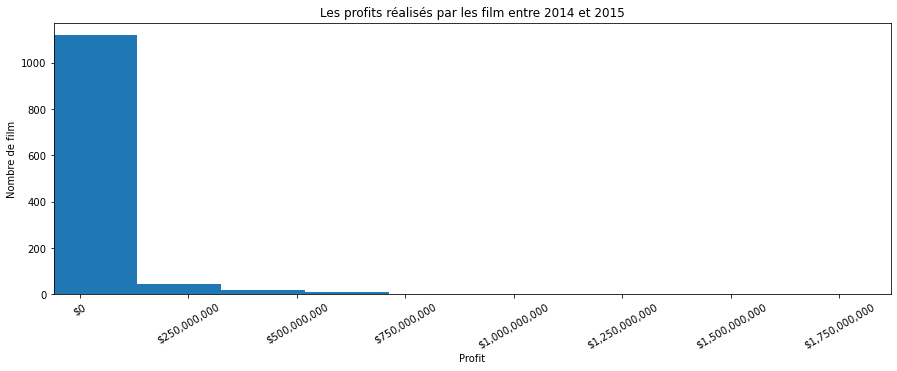

In [37]:
fig,ax=plt.subplots(figsize=(15, 5))
plt.hist(df_profit['profit'])
plt.xlim(min(df_profit['profit']),max(df_profit['profit']))
ax.set(title='Les profits réalisés par les film entre 2014 et 2015', xlabel='Profit', ylabel='Nombre de film')
plt.xticks(rotation = 30)
ax.xaxis.set_major_formatter('${x:1,.0f}');


> On constate  de 2014 à 2015, qu’il y a beaucoup de films qui ont rapporté très peu de bénéfices, il ya même qui ont perdus de l'argent. 


### Question 3:  Quels sont les genres de films les plus appréciés du public entre 2014 et 2015?

In [38]:
#créons la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize du graphique
def affiche_graphique_labels(titre,xlabel,ylabel, sizetitre):
    plt.title(titre,fontsize=sizetitre);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt

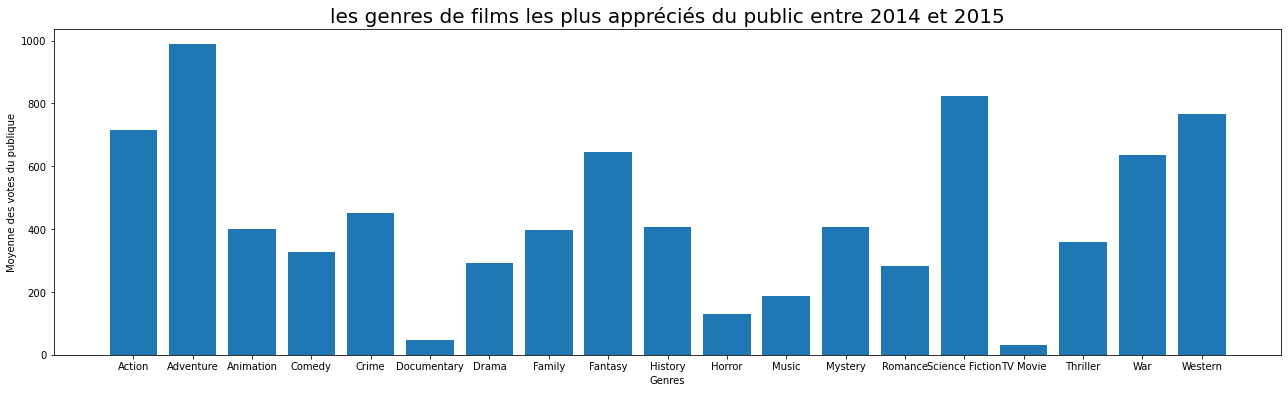

In [39]:
#nous utiliserons matplotlib fonction pour tracer le figure
df=df_genre_vote.groupby('genres',as_index=False)['vote_count'].mean()
plt.figure(figsize=(22,6))
plt.bar(df.iloc[:,0],df.iloc[:,1])
#la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize du graphique
affiche_graphique_labels("les genres de films les plus appréciés du public entre 2014 et 2015","Genres","Moyenne des votes du publique",20);


>on peut conclure que les films **d’aventure** sont les plus appréciés auprès du publique, suivi du genre **science-fiction et western**. Les genres **TV movie, documentaire et Horror** sont les moins apprécies.

### Question 4: Est-ce que les films qui ont rapporté plus de revenus, sont-ils les plus populaires entre 2014 et 2015?

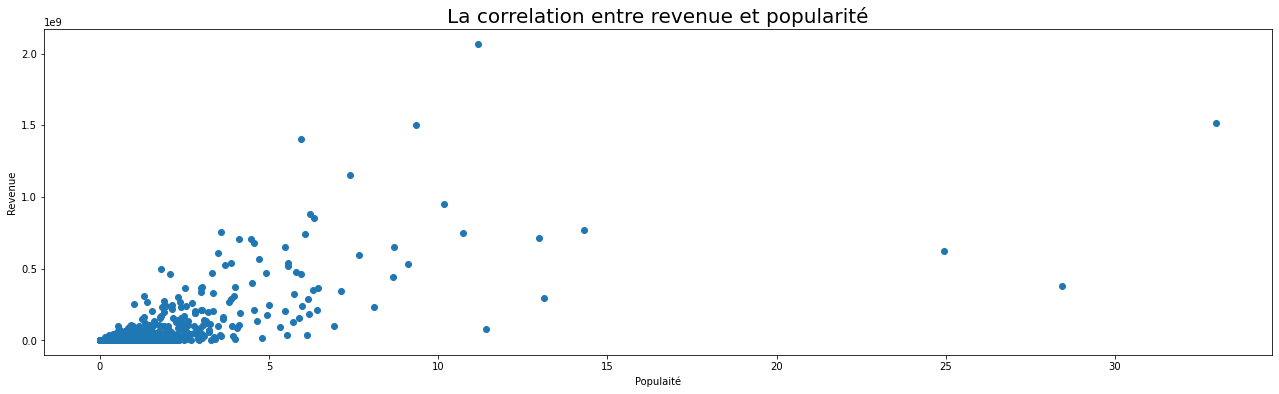

In [40]:
#utilisons plt.scatter() pour voir la correlation entre revenue et popularité
plt.figure(figsize=(22,6))
plt.scatter(df_film_revenu_popularite.iloc[:,1],df_film_revenu_popularite.iloc[:,3])
#la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize du graphique
affiche_graphique_labels("La correlation entre revenue et popularité","Populaité","Revenue",20);

> pour resume,il n’y a pas de très forte corrélation entre la popularité et le revenu, car il y a de nombreux film qui ont moins de popularité mais qui ont rapportés beaucoup de revenue.

<a id='conclusions'></a>
## Conclusions
>Ensemble de données contient des informations sur plus de 10 000 films sortie entre 1960-2015.Notre analyse se concentre sur les films sorties les deux dernieres années à savoir entre 2014 et 2015.

> Finalement on peut conclure que:

> Les cinq (5) films les plus populaires de 2014 à 2015 sont : **Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent**.

> On constate également de 2014 à 2015, qu’il y a beaucoup de films qui ont rapporté très peu de bénéfices, il ya même qui ont perdus de l'argent. 

> Les films **d’aventure** sont les plus appréciés auprès du publique, suivi du genre **science-fiction et western**. Les genres **TV movie, documentaire et Horror** sont les moins apprécies.

> Il n’y a pas de très forte corrélation entre la popularité et le revenu, car il y a de nombreux film qui ont moins de popularité mais qui ont rapportés beaucoup de revenue.


### Limitations
> L’analyse des données dans ce document concerne seulement des données de 2014 à 2015, il ne prend pas en compte les autres années.

